In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | koromilea
City not found. Skipping...
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | visnes
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | chiredzi
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | bousso
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | mocuba
Processing Record 16 of Set 1 | palmares do sul
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | hermanus
Pr

Processing Record 43 of Set 4 | tateyama
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | nan
Processing Record 46 of Set 4 | khor
Processing Record 47 of Set 4 | plouzane
Processing Record 48 of Set 4 | imbituba
Processing Record 49 of Set 4 | barra patuca
Processing Record 50 of Set 4 | taoudenni
Processing Record 1 of Set 5 | coihaique
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | isabela
Processing Record 8 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | winnemucca
Processing Record 11 of Set 5 | sungaipenuh
Processing Record 12 of Set 5 | ondangwa
Processing Record 13 of Set 5 | saint-joseph
Processing Record 14 of Set 5 | sioux lookout
Processing Record 15 of Set 5 | buala
Processing Record 16 of Set 5 | nehe
Process

Processing Record 33 of Set 8 | adrar
Processing Record 34 of Set 8 | leo
Processing Record 35 of Set 8 | wagga wagga
Processing Record 36 of Set 8 | pangkalanbuun
Processing Record 37 of Set 8 | karangasem
Processing Record 38 of Set 8 | san fernando
Processing Record 39 of Set 8 | pevek
Processing Record 40 of Set 8 | cohoes
Processing Record 41 of Set 8 | qingan
City not found. Skipping...
Processing Record 42 of Set 8 | havre-saint-pierre
Processing Record 43 of Set 8 | messina
Processing Record 44 of Set 8 | miraflores
Processing Record 45 of Set 8 | saleaula
City not found. Skipping...
Processing Record 46 of Set 8 | zary
Processing Record 47 of Set 8 | kulhudhuffushi
Processing Record 48 of Set 8 | bilibino
Processing Record 49 of Set 8 | kudahuvadhoo
Processing Record 50 of Set 8 | chapleau
Processing Record 1 of Set 9 | iquique
Processing Record 2 of Set 9 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 9 | keskin
Processing Record 4 of Set 9 | dranceni sa

Processing Record 21 of Set 12 | sulangan
Processing Record 22 of Set 12 | zvishavane
Processing Record 23 of Set 12 | lungi
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | abu samrah
Processing Record 26 of Set 12 | nelson
Processing Record 27 of Set 12 | taggia
Processing Record 28 of Set 12 | port lincoln
Processing Record 29 of Set 12 | gonen
Processing Record 30 of Set 12 | finspang
Processing Record 31 of Set 12 | nemuro
Processing Record 32 of Set 12 | wajir
Processing Record 33 of Set 12 | burgeo
Processing Record 34 of Set 12 | williston
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | pahrump
Processing Record 37 of Set 12 | el dorado
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
len(city_data)

546

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,39.00,83,98,3.00,NZ,2020-07-08 14:30:13
1,Jamestown,42.10,-79.24,82.99,73,1,5.82,US,2020-07-08 14:28:12
2,Busselton,-33.65,115.33,46.99,87,12,6.98,AU,2020-07-08 14:30:05
3,Broome,42.25,-75.83,78.01,88,90,3.36,US,2020-07-08 14:31:57
4,Visnes,59.36,5.22,57.20,62,40,17.22,NO,2020-07-08 14:30:05
5,Praia Da Vitoria,38.73,-27.07,71.60,83,75,8.52,PT,2020-07-08 14:29:05
6,Chiredzi,-21.05,31.67,71.69,46,0,8.57,ZW,2020-07-08 14:30:37
7,Severo-Kurilsk,50.68,156.12,48.40,92,100,14.85,RU,2020-07-08 14:30:08
8,Kavieng,-2.57,150.80,82.15,79,98,13.33,PG,2020-07-08 14:30:07
9,Bousso,10.48,16.71,94.91,36,39,2.73,TD,2020-07-08 14:31:57


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-07-08 14:30:13,-46.60,168.33,39.00,83,98,3.00
1,Jamestown,US,2020-07-08 14:28:12,42.10,-79.24,82.99,73,1,5.82
2,Busselton,AU,2020-07-08 14:30:05,-33.65,115.33,46.99,87,12,6.98
3,Broome,US,2020-07-08 14:31:57,42.25,-75.83,78.01,88,90,3.36
4,Visnes,NO,2020-07-08 14:30:05,59.36,5.22,57.20,62,40,17.22
5,Praia Da Vitoria,PT,2020-07-08 14:29:05,38.73,-27.07,71.60,83,75,8.52
6,Chiredzi,ZW,2020-07-08 14:30:37,-21.05,31.67,71.69,46,0,8.57
7,Severo-Kurilsk,RU,2020-07-08 14:30:08,50.68,156.12,48.40,92,100,14.85
8,Kavieng,PG,2020-07-08 14:30:07,-2.57,150.80,82.15,79,98,13.33
9,Bousso,TD,2020-07-08 14:31:57,10.48,16.71,94.91,36,39,2.73


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:

city_data_df = pd.read_csv("weather_data/cities.csv")

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [3]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594220298.500947

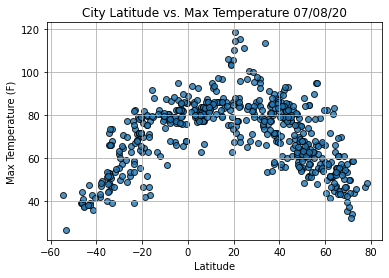

In [4]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

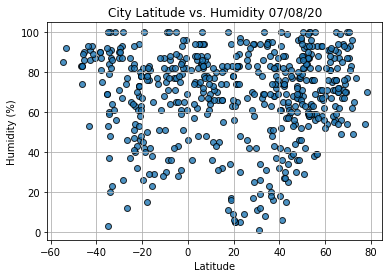

In [5]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

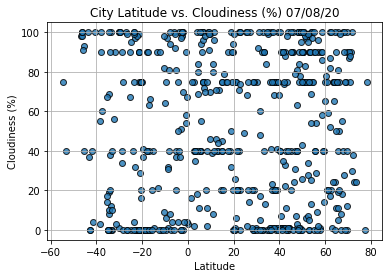

In [6]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

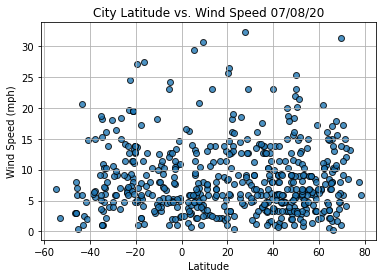

In [7]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()